In [75]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

In [76]:
adult = pd.read_csv('adult/adult.csv', delimiter=', ')

/Library/Python/3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [77]:
data = adult
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
data.isnull().values.any()

False

In [79]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [80]:
data['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [81]:
data['salary'] = data['salary'].map({ "<=50K": 0, ">50K": 1 })
y = data['salary']
data = data.drop('salary', axis=1)

In [82]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
data = data.drop("capital-gain", axis=1)
data = data.drop("capital-loss", axis=1)

In [84]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [85]:
data = pd.get_dummies(data, columns=[
    "workclass", "education", "marital-status", "occupation", "relationship",
    "race", "sex", "native-country",
])

In [86]:
data

,age,fnlwgt,education-num,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.25, stratify=y)

print(f'Sizes:\n\tX_train: {X_train.shape}\n\tX_test: {X_test.shape}\
                \n\ty_train: {y_train.shape}\n\ty_test: {y_test.shape}')

Sizes:
	X_train: (24420, 106)
	X_test: (8141, 106)                
	y_train: (24420,)
	y_test: (8141,)


In [88]:
pd.value_counts(pd.Series(y))

0    24720
1     7841
Name: salary, dtype: int64

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data import TensorDataset

In [90]:
y_train

23537    0
24519    0
23990    1
26074    1
22149    0
        ..
14717    1
27034    0
4671     0
17768    0
17185    0
Name: salary, Length: 24420, dtype: int64

In [55]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(np.array(y_train))
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(np.array(y_test))

In [63]:
X_train.shape

torch.Size([24420, 106])

In [56]:
train_tensor = torch.utils.data.TensorDataset(X_train, y_train)
test_tensor = torch.utils.data.TensorDataset(X_test, y_test)

In [60]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout, f):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(p=dropout)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)
        self.f = f
    
    def forward(self, x):
        out = self.f(self.fc1(x))
        
        out = self.f(self.fc2(out))
        out = self.dropout(out)
        out = self.f(self.fc3(out))
        out = self.fc4(out)
        return out

In [70]:
def train_analysis(batch_size = 64, learning_rate=0.01, num_classes=2, input_size = 106,
                   hidden_size = 200, num_epochs=120, dropout=0, graph=True, func=F.relu):

    #Prepare data
    train_loader = torch.utils.data.DataLoader(train_tensor, batch_size=batch_size)

    #Create net
    net = NeuralNet(input_size, hidden_size, num_classes, dropout, func)
        
    criterion = nn.CrossEntropyLoss()
    optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)

    #Train net
    loss_values = []
    total_step = len(train_loader)

    for _ in range(num_epochs):

        net.train()
        train_loss = 0.0

        for Xs, ys in train_loader:
            
            # forward pass
            outputs = net(Xs)
            loss = criterion(outputs, ys)
            
            # backward and optimise
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            train_loss += loss.item()

        loss_values.append(train_loss / total_step)

    if graph:
        plt.figure(figsize=(12,8))
        plt.ylabel('Training Loss', fontsize=20)
        plt.xlabel('Epoch', fontsize=20)
        plt.plot(range(len(loss_values)), loss_values)
        plt.show()
     
    return net


def measure_accuracy(net):
    
    test_loader = torch.utils.data.DataLoader(test_tensor, batch_size=64)
    
    #Calculate Accuracy
    net.eval()
    correct = 0
    total = 0
    for Xs, ys in test_loader:
        outputs = net(Xs)
        _, predicted = torch.max(outputs.data, 1)
        total += ys.size(0)
        correct += (predicted == ys).sum().item()
    return correct/total

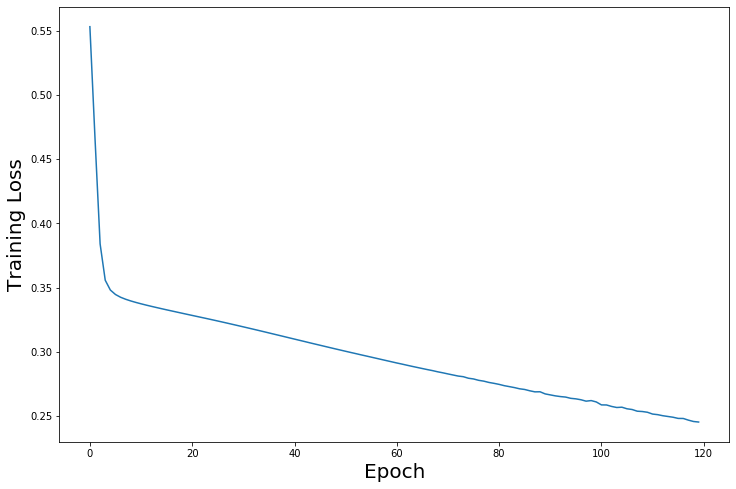

In [68]:
net = train_analysis()

In [71]:
print(measure_accuracy(net))

0.8213978626704336


In [92]:
X_train.shape

(24420, 106)

In [93]:
from sklearn.neural_network import MLPClassifier

In [98]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [106]:
param_grid = {
    'solver':['lbfgs', 'sgd', 'adam'],
    'activation':['relu'],
    'alpha':[0.0001, 0.001, 0.01, 0.1],
    'learning_rate':['constant', 'adaptive'],
    'batch_size':[64, 128, 256],
    'hidden_layer_sizes':[(100, 100)]
}

In [108]:
nn = MLPClassifier()

best_nn = GridSearchCV(nn, param_grid, n_jobs=-1, cv=5, verbose=2)
best_nn.fit(X_train, y_train)

print("best params: ", best_nn.best_params_)
print("best acc: ", best_nn.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 